#### Demo: Generate a data set with one feature and fit verious regression polynomial models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)
print(f'Using NumPy {np.__version__}')

Using NumPy 1.23.5


#### Let's first define the "true model" $f$, a cubic polynomial. 
We'll use $f(x)=2+x-x^2+2x^3$. In practice, of course, you don't know $f$.

In [2]:
w = np.array([2,1,-3,2]) # weights of true model (a cubic polynomial)

#### We will use a training set of size $N$ with only one feature.
We'll use a training set $S$ of size $N$. We start by generating the feature $x$ values.

In [3]:
np.random.seed(0) # Try 0 and 2
N = 20 # size of training set
feature = np.random.uniform(-5,5,N)
print(feature)

[ 0.488  2.152  1.028  0.449 -0.763  1.459 -0.624  3.918  4.637 -1.166
  2.917  0.289  0.68   4.256 -4.29  -4.129 -4.798  3.326  2.782  3.7  ]


In [4]:
def f(w,x):
    '''evaluate the true model at x'''
    y = 0.
    for i in range(len(w)):
        y = y + w[i]*(x**i)
    return y

In [5]:
def polynomial_frame(feature, degree):
    poly_frame = np.ones((len(feature),degree+1))
    # and set poly_frame[1] equal to the passed feature
    poly_frame[:,1] = feature
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            poly_frame[:,power] = feature**power
    return poly_frame

#### Let's generate the response $y$ with a bit of random noise

[ -17.839   25.513   21.548   11.001  -12.227   -1.019   12.447   85.414
  144.704  -25.022   -2.476   -0.56    -0.423   90.381 -207.849 -217.241
 -286.428   64.378   49.829   63.687]


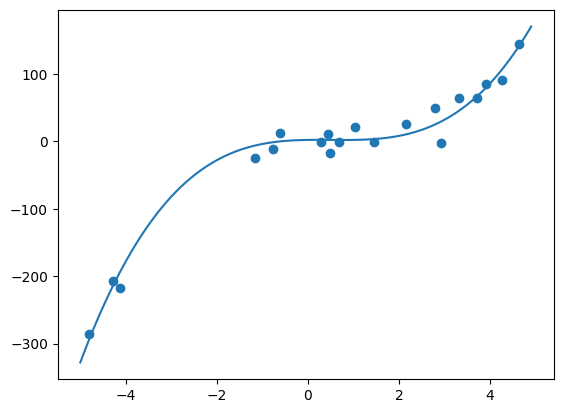

In [6]:
# generate reponse by evaluating f(X) and adding a small amount of noise
y = f(w,feature) + np.random.default_rng().normal(0,20,size=(N,))
print(y)
# plot sample data with ground truth model superimposed
plt.scatter(feature,y)
plt.plot(np.arange(-5,5,0.1),f(w,np.arange(-5,5,0.1)))

#### We'll start with a cubic model

In [7]:
X=polynomial_frame(feature,3)
print(X)

[[   1.       0.488    0.238    0.116]
 [   1.       2.152    4.631    9.965]
 [   1.       1.028    1.056    1.085]
 [   1.       0.449    0.201    0.09 ]
 [   1.      -0.763    0.583   -0.445]
 [   1.       1.459    2.129    3.105]
 [   1.      -0.624    0.39    -0.243]
 [   1.       3.918   15.349   60.132]
 [   1.       4.637   21.498   99.68 ]
 [   1.      -1.166    1.359   -1.584]
 [   1.       2.917    8.51    24.827]
 [   1.       0.289    0.083    0.024]
 [   1.       0.68     0.463    0.315]
 [   1.       4.256   18.113   77.089]
 [   1.      -4.29    18.401  -78.934]
 [   1.      -4.129   17.046  -70.379]
 [   1.      -4.798   23.019 -110.441]
 [   1.       3.326   11.064   36.8  ]
 [   1.       2.782    7.737   21.521]
 [   1.       3.7     13.691   50.658]]


In [8]:
# compute the estimated model in closed form
w_hat=np.linalg.inv(X.T@X)@X.T@y
w_hat

array([-1.198,  6.969, -3.018,  1.684])

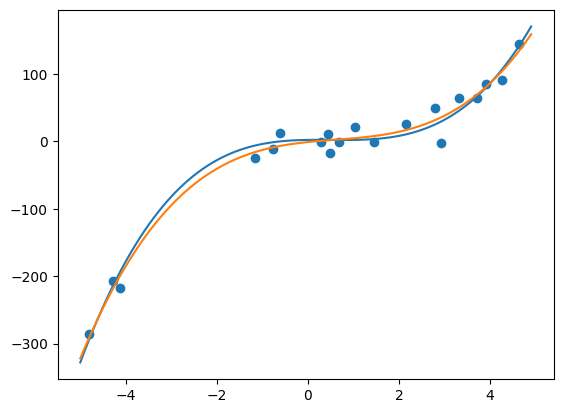

In [9]:
# plot sample data with true model and estimated model superimposed
plt.scatter(feature,y)
plt.plot(np.arange(-5,5,0.1),f(w,np.arange(-5,5,0.1)))
plt.plot(np.arange(-5,5,0.1),f(w_hat,np.arange(-5,5,0.1)))

In [10]:
# note that even though the models are very similar the coefficients don't have to be!
print(f'true model weights: {w}')
print(f'estimated weights: {w_hat}')

true model weights: [ 2  1 -3  2]
estimated weights: [-1.198  6.969 -3.018  1.684]


In [11]:
def MSE(y,y_hat):
    return (np.dot(y-y_hat,y-y_hat))/len(y)
print(f'MSE={MSE(y, X@w_hat):.3f}, RMSE={np.sqrt(MSE(y, X@w_hat)):.3f}')

MSE=207.336, RMSE=14.399


#### Let's try a fitting with a higher order polynomial to reduce the MSE

In [12]:
order = 10
X=polynomial_frame(feature,order)
w_hat=np.linalg.inv(X.T@X)@X.T@y  # remember the model!
print(f'Higher order model={w_hat}')
print(f'MSE={MSE(y, X@w_hat):.3f}, RMSE={np.sqrt(MSE(y, X@w_hat)):.3f}')

Higher order model=[  1.249  -9.286   4.02   20.366 -10.385  -1.77    1.416   0.042  -0.068
   0.      0.001]
MSE=154.370, RMSE=12.425


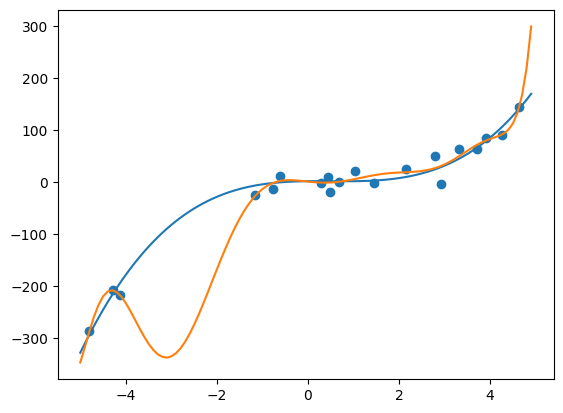

In [13]:
plt.scatter(feature,y)
plt.plot(np.arange(-5,5,0.1),f(w,np.arange(-5,5,0.1)))
plt.plot(np.arange(-5,5,0.1),f(w_hat,np.arange(-5,5,0.1)))

#### Now, a linear fit, should yield higher MSE

In [14]:
X=polynomial_frame(feature,1)
w_hat=np.linalg.inv(X.T@X)@X.T@y
print(f'Linear model={w_hat}')
print(f'MSE={MSE(y, X@w_hat):.3f}, RMSE={np.sqrt(MSE(y, X@w_hat)):.3f}')

Linear model=[-39.039  35.473]
MSE=1418.856, RMSE=37.668


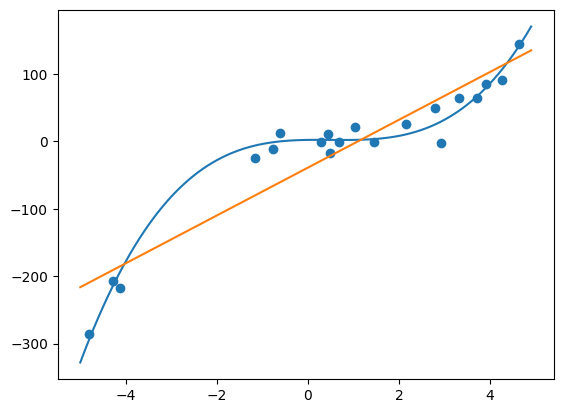

In [15]:
plt.scatter(feature,y)
plt.plot(np.arange(-5,5,0.1),f(w,np.arange(-5,5,0.1)))
plt.plot(np.arange(-5,5,0.1),f(w_hat,np.arange(-5,5,0.1)))

### Let's let's get scikit-learn to learn the same three models.
*Note*: since scikit-learn does not expect tall vectors we need to extract the true features before fitting a model.

linear_model slope:  [-0.077]
linear_model intercept:  0.014047786317753053
Max prediction error: 1.47
Mean squared error: 0.53
Root mean squared error: 0.73


C:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


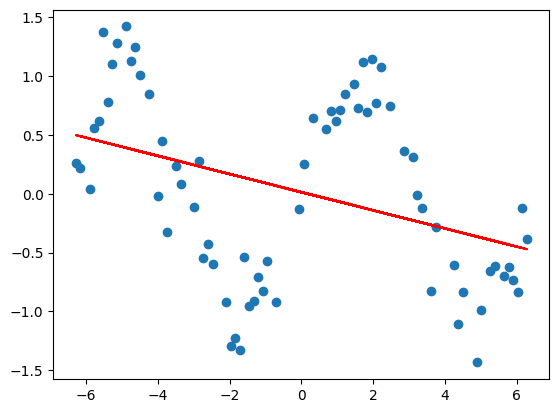

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import __version__ as sklearn_version

linear_model = LinearRegression() # Instantiate and initialize a linear regression model
X=feature.reshape(-1, 1) # only the true features are needed
linear_model.fit(X,y) # this computes the optimal weights
# Let's examine the learned parameters
print("linear_model slope: ", linear_model.coef_)
print("linear_model intercept: ", linear_model.intercept_)
# Let's make predictions based on our model
y_hat = linear_model.predict(X)
linear_model_max_error = metrics.max_error(y, y_hat)
linear_model_mse = metrics.mean_squared_error(y, y_hat, squared=True)
linear_model_rmse = metrics.mean_squared_error(y, y_hat, squared=False)
print(f'Max prediction error: {linear_model_max_error:.2f}')
print(f'Mean squared error: {linear_model_mse:.2f}')
print(f'Root mean squared error: {linear_model_rmse:.2f}')
plt.scatter(feature, y)
plt.plot(feature, y_hat, c = 'red')
plt.show()

*Exercise.* Compute the cubic and quintic models using scikit-learn. For each model, print the MSE and RMSE and compare with the results obtained above.

In [38]:
from sklearn.preprocessing import PolynomialFeatures, normalize

Max prediction error: 1.17
Mean squared error: 0.42
Root mean squared error: 0.65


C:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


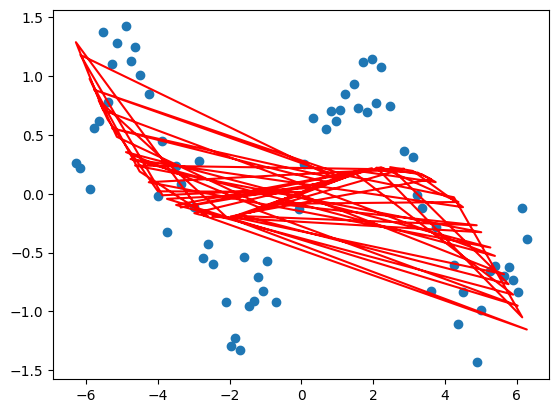

In [57]:
poly = PolynomialFeatures(degree=3)
poly_features = poly.fit_transform(feature.reshape(-1, 1))
poly_reg = LinearRegression()
poly_reg.fit(poly_features, y)
y_hat = poly_reg.predict(poly_features)
poly_max_error = metrics.max_error(y, y_hat)
poly_model_mse = metrics.mean_squared_error(y, y_hat, squared=True)
poly_model_rmse = metrics.mean_squared_error(y, y_hat, squared=False)
print(f'Max prediction error: {poly_max_error:.2f}')
print(f'Mean squared error: {poly_model_mse:.2f}')
print(f'Root mean squared error: {poly_model_rmse:.2f}')
plt.scatter(feature, y)
plt.plot(feature, y_hat, c = 'red')
plt.show()

### Let's try a few more examples.

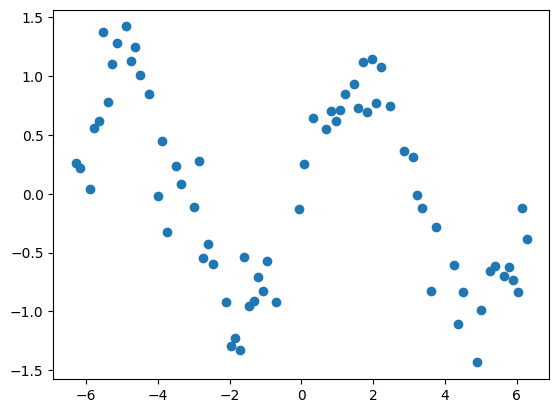

In [18]:
# Load train data from csv file into a NumPy array
data = np.genfromtxt('featuremaps/train.csv', delimiter=',', skip_header=True)
# plot sample data with ground truth model superimposed
feature = data[:,0]
y = data[:,1]
plt.scatter(feature,y)

***Exercise.*** Fit polynomials of order $k$, for $k=5, 10, 20$ and estimate the MSE for each model. Comment on the quality of the models.

***Exercise.*** Update the For each $k$ above, add an extra feature $\sin(x)$, and fit a model again.  Thus, the new feature map is $[1, x, x^2,\ldots, x^k, \sin(x)]^T$.  Compute the MSEs and comment on the results.

***Exercise.*** Load the set `small.csv` and fit order $k$ polynomials with $k=1, 2, 5, 10, 20$. What are the new MSEs. What do you conclude form this?